## Cle Elum Ridge (CER) Treatment Manuscript Scripts 
## `figure2_all_together` where the top is from `figure2_3_domain` and the bottom is from `figure2_5_bottom..`

created by Cassie Lumbrazo\
last updated: July 2025\
run location: UAS Linux\
python environment: **cer_treatment**

In [2]:
# import packages 
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

import scipy

In [3]:
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
from matplotlib import ticker

In [4]:
figure_path = '/home/cassie/data/cer_treatment_manuscript/figures/' # Cassie remote path on new linux machine

# ds = xr.open_dataset('C:\\Users\\Lumbr\\OneDrive - UW/Documents\\Washington\\EasternCascades\\Python\\CER_raster_analysis\\rapid_model_cleandata_create_netcdf_negtozero_v3_b.nc') 
ds = xr.open_dataset('/home/cassie/data/cer_treatment_manuscript/cer_treatment_region_dataset_all_variables.nc') # Cassie remote path on new linux machine

In [21]:
colorpre='darkslategray'
colorpos='royalblue'

colorsouth = 'darkorange'
colornorth = 'darkblue'

So, we want to calculate the percentage of canopy cover like before in notebook `7_canopy_cover`\
except now we want to break this up by aspect (side of the ridge)\
So I made a copy of notebook 7 to just edit the code for aspect and replot everything. 

### Calculate % Canopy Cover On Each Side of the Ridge

In [6]:
# create two versions of the dataframe, one for the north and one for the south
ds_north = ds.where(ds['baf_ridge'] == -1, drop=True)
ds_south = ds.where(ds['baf_ridge'] ==  1, drop=True)

In [7]:
# Initialize the DataFrame
df = pd.DataFrame(columns=['BAF', 'pre_north', 'pre_south', 'post_north', 'post_south'])
df['BAF'] = [1, 2, 17, 30, 32, 38, 60, 69, 80, 82, 90, 140, 150, 155]

# Loop through the BAF values and calculate the percentage of canopy cover
for index, row in df.iterrows():
    BAF = row['BAF']
    
    # Define the canopy cover threshold
    canopy_threshold = 3
    
    #_______________________________________________________________________________
    # PRE-TREATMENT
    # Determine the canopy grid cells
    canopy_mask = ds_north['chmws_ncalm'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds_north['baf'].where(ds_north['baf'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df.at[index, 'pre_north'] = percentage_canopy_cover.values.astype(int)
    
    #_______________________________________________________________________________
    # now, do the same thing for the south side 
    canopy_mask = ds_south['chmws_ncalm'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds_south['baf'].where(ds_south['baf'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df.at[index, 'pre_south'] = percentage_canopy_cover.values.astype(int)

    #_______________________________________________________________________________
    # POST-TREATMENT
    # Determine the canopy grid cells
    canopy_mask = ds_north['chmws_rapid'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds_north['baf'].where(ds_north['baf'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df.at[index, 'post_north'] = percentage_canopy_cover.values.astype(int)
    
    #_______________________________________________________________________________
    # now, do the same thing for the south side 
    canopy_mask = ds_south['chmws_rapid'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds_south['baf'].where(ds_south['baf'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df.at[index, 'post_south'] = percentage_canopy_cover.values.astype(int)

# Print the DataFrame
# print(df)

/tmp/ipykernel_4166931/2941905073.py:28: RuntimeWarning: invalid value encountered in cast
  df.at[index, 'pre_north'] = percentage_canopy_cover.values.astype(int)
/tmp/ipykernel_4166931/2941905073.py:63: RuntimeWarning: invalid value encountered in cast
  df.at[index, 'post_north'] = percentage_canopy_cover.values.astype(int)
/tmp/ipykernel_4166931/2941905073.py:28: RuntimeWarning: invalid value encountered in cast
  df.at[index, 'pre_north'] = percentage_canopy_cover.values.astype(int)
/tmp/ipykernel_4166931/2941905073.py:63: RuntimeWarning: invalid value encountered in cast
  df.at[index, 'post_north'] = percentage_canopy_cover.values.astype(int)
/tmp/ipykernel_4166931/2941905073.py:45: RuntimeWarning: invalid value encountered in cast
  df.at[index, 'pre_south'] = percentage_canopy_cover.values.astype(int)
/tmp/ipykernel_4166931/2941905073.py:80: RuntimeWarning: invalid value encountered in cast
  df.at[index, 'post_south'] = percentage_canopy_cover.values.astype(int)
/tmp/ipykerne

In [8]:
# cleaning up a few things
df = df.astype(int)

# drop any values < 0, and make nan 
df = df.where(df > 0)

# change the value of df['baf'] 1 to 'leave gap' and 2 to 'leave forest'
#df['BAF'] = df['BAF'].replace({1: 'leave gap', 2: 'leave forest', 17: 'BAF 17', 30: 'BAF 30', 32: 'BAF 32', 38: 'BAF 38', 
#                                       60: 'BAF 60', 69: 'BAF 69', 80: 'BAF 80', 82: 'BAF 82', 90: 'BAF 90', 140: 'BAF 140', 150: 'BAF 150', 155: 'BAF 155'})

df['BAF'] = df['BAF'].replace({1: 'leave gap', 2: 'leave forest', 17: 'BA 17', 30: 'BA 30', 32: 'BA 32', 38: 'BA 38', 
                                       60: 'BA 60', 69: 'BA 69', 80: 'BA 80', 82: 'BA 82', 90: 'BA 90', 140: 'BA 140', 150: 'BA 150', 155: 'BA 155'})

# move the leave forest to the last place in the dataframe
df = df.reindex([0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1])

df

,BAF,pre_north,pre_south,post_north,post_south
0,leave gap,34.0,9.0,64.0,15.0
2,BA 17,9.0,13.0,9.0,24.0
3,BA 30,NaN,20.0,NaN,30.0
4,BA 32,83.0,NaN,53.0,NaN
5,BA 38,87.0,NaN,42.0,NaN
6,BA 60,68.0,76.0,49.0,41.0
7,BA 69,NaN,59.0,NaN,53.0
8,BA 80,NaN,80.0,NaN,47.0
9,BA 82,79.0,100.0,62.0,100.0
10,BA 90,NaN,89.0,NaN,56.0


But we really need this dataframe is a different structure to plot it...

In [9]:
df['pre_north'] = df['pre_north'].where(df['BAF'] != 'BA 17', np.nan) # there should not be values for 17 on north
df['post_north'] = df['post_north'].where(df['BAF'] != 'BA 17', np.nan)

df['pre_south'] = df['pre_south'].where(df['BAF'] != 'BA 82', np.nan) # there should not be values for 82 on south
df['post_south'] = df['post_south'].where(df['BAF'] != 'BA 82', np.nan)

df

,BAF,pre_north,pre_south,post_north,post_south
0,leave gap,34.0,9.0,64.0,15.0
2,BA 17,NaN,13.0,NaN,24.0
3,BA 30,NaN,20.0,NaN,30.0
4,BA 32,83.0,NaN,53.0,NaN
5,BA 38,87.0,NaN,42.0,NaN
6,BA 60,68.0,76.0,49.0,41.0
7,BA 69,NaN,59.0,NaN,53.0
8,BA 80,NaN,80.0,NaN,47.0
9,BA 82,79.0,NaN,62.0,NaN
10,BA 90,NaN,89.0,NaN,56.0


In [10]:
# fill the pre_north column and "leave forest" row with 98 
df['pre_north'] = df['pre_north'].where(df['BAF'] != 'leave forest', 98) # filling with the BAF 150 values
df['post_north'] = df['post_north'].where(df['BAF'] != 'leave forest', 99) # filling with the BAF 150 values

# now, drop the row BAF 150 since it's the leave forest and we want it named that for now 
df = df.drop(df[df['BAF'] == 'BA 150'].index)

df

,BAF,pre_north,pre_south,post_north,post_south
0,leave gap,34.0,9.0,64.0,15.0
2,BA 17,NaN,13.0,NaN,24.0
3,BA 30,NaN,20.0,NaN,30.0
4,BA 32,83.0,NaN,53.0,NaN
5,BA 38,87.0,NaN,42.0,NaN
6,BA 60,68.0,76.0,49.0,41.0
7,BA 69,NaN,59.0,NaN,53.0
8,BA 80,NaN,80.0,NaN,47.0
9,BA 82,79.0,NaN,62.0,NaN
10,BA 90,NaN,89.0,NaN,56.0


In [11]:
# # the BAF 150 on the north side is the leave forest.... 
# # so let's rename BAF 150 in the dataframe to leave forest 
# df['BAF'] = df['BAF'].replace({'BAF 150': 'leave forest'})
# df

In [12]:
# make df a tidy dataframe for box plot plotting 
df_tidy = df.melt(id_vars='BAF', var_name='treatment', value_name='canopy_cover')
df_tidy

,BAF,treatment,canopy_cover
0,leave gap,pre_north,34.0
1,BA 17,pre_north,NaN
2,BA 30,pre_north,NaN
3,BA 32,pre_north,83.0
4,BA 38,pre_north,87.0
5,BA 60,pre_north,68.0
6,BA 69,pre_north,NaN
7,BA 80,pre_north,NaN
8,BA 82,pre_north,79.0
9,BA 90,pre_north,NaN


In [13]:
# # # can you make this dataframe so that the order of 'treatment' is pre_north, post_north, pre_south, post_south 
# df_tidy = df_tidy.reindex([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,           #pre_north
#                            26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, #post_north
#                            13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, #pre_south
#                            39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,  #post_south
#                            ])  
# df_tidy

In [14]:
df_tidy_north = df_tidy.where((df_tidy['treatment'] == 'pre_north') | (df_tidy['treatment'] == 'post_north')).dropna(how='all')
df_tidy_south = df_tidy.where((df_tidy['treatment'] == 'pre_south') | (df_tidy['treatment'] == 'post_south')).dropna(how='all')
#df_tidy_south

In [15]:
# rename the pre_north to pre-treatment and post_north to post-treatment
df_tidy_north['treatment'] = df_tidy_north['treatment'].replace({'pre_north': 'pre-treatment', 'post_north': 'post-treatment'})
df_tidy_south['treatment'] = df_tidy_south['treatment'].replace({'pre_south': 'pre-treatment', 'post_south': 'post-treatment'})
df_tidy_south

,BAF,treatment,canopy_cover
13,leave gap,pre-treatment,9.0
14,BA 17,pre-treatment,13.0
15,BA 30,pre-treatment,20.0
16,BA 32,pre-treatment,NaN
17,BA 38,pre-treatment,NaN
18,BA 60,pre-treatment,76.0
19,BA 69,pre-treatment,59.0
20,BA 80,pre-treatment,80.0
21,BA 82,pre-treatment,NaN
22,BA 90,pre-treatment,89.0


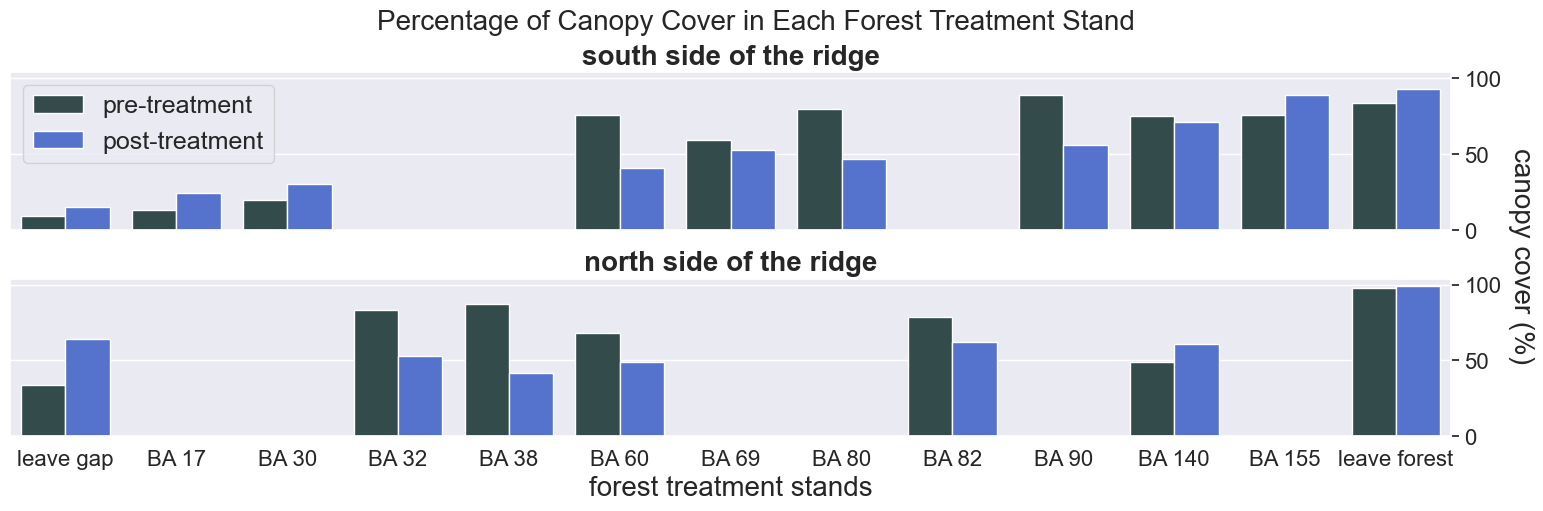

In [33]:
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(15,5), constrained_layout = True)
palette = [colorpre, colorpos]

fontsize_num = 20

plt.suptitle('Percentage of Canopy Cover in Each Forest Treatment Stand', fontsize=fontsize_num)

# Create a barplot with values
barplot = sns.barplot(data= df_tidy_north, ax=axes[1], x='BAF', y='canopy_cover', hue='treatment', palette=palette)    
barplot = sns.barplot(data= df_tidy_south, ax=axes[0], x='BAF', y='canopy_cover', hue='treatment', palette=palette)

# Customize the layout
axes[0].set_xlabel('')
axes[1].set_xlabel('forest treatment stands', fontsize=fontsize_num)

axes[0].set_ylabel('')
axes[1].set_ylabel('')

# Move the y-axis to the right side
for ax in axes:
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position("right")
    
# make a single y-axies label centered between the two subplots 
fig.text(1.01, 0.5, 'canopy cover (%)', ha='center', va='center', rotation=270, fontsize=20)

axes[0].legend(fontsize=18)
# do not show the legend in the second subplot
axes[1].legend().set_visible(False)
# axes[1].legend(fontsize=fontsize_num)

axes[0].set_title('south side of the ridge', fontsize=fontsize_num, fontweight='bold')
axes[1].set_title('north side of the ridge', fontsize=fontsize_num, fontweight='bold')

# increase the size of the xtick labels
axes[0].tick_params(axis='both', which='major', labelsize=16) #width=2)
axes[1].tick_params(axis='both', which='major', labelsize=16) #width=2)

# export the figure with high resolution
figure_name = 'figure2_bottom.png'
# plt.savefig(figure_path + figure_name, dpi=500) # this does not print the canopy cover text on the right side 
plt.savefig(figure_path + figure_name, dpi=500, bbox_inches='tight') # that fixed the problem

plt.show()

# Figure 2 All Together

In [ ]:
from matplotlib.gridspec import GridSpec
from matplotlib_scalebar.scalebar import ScaleBar

/home/cassie/programs/miniforge3/envs/cer_treatment/lib/python3.13/site-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(


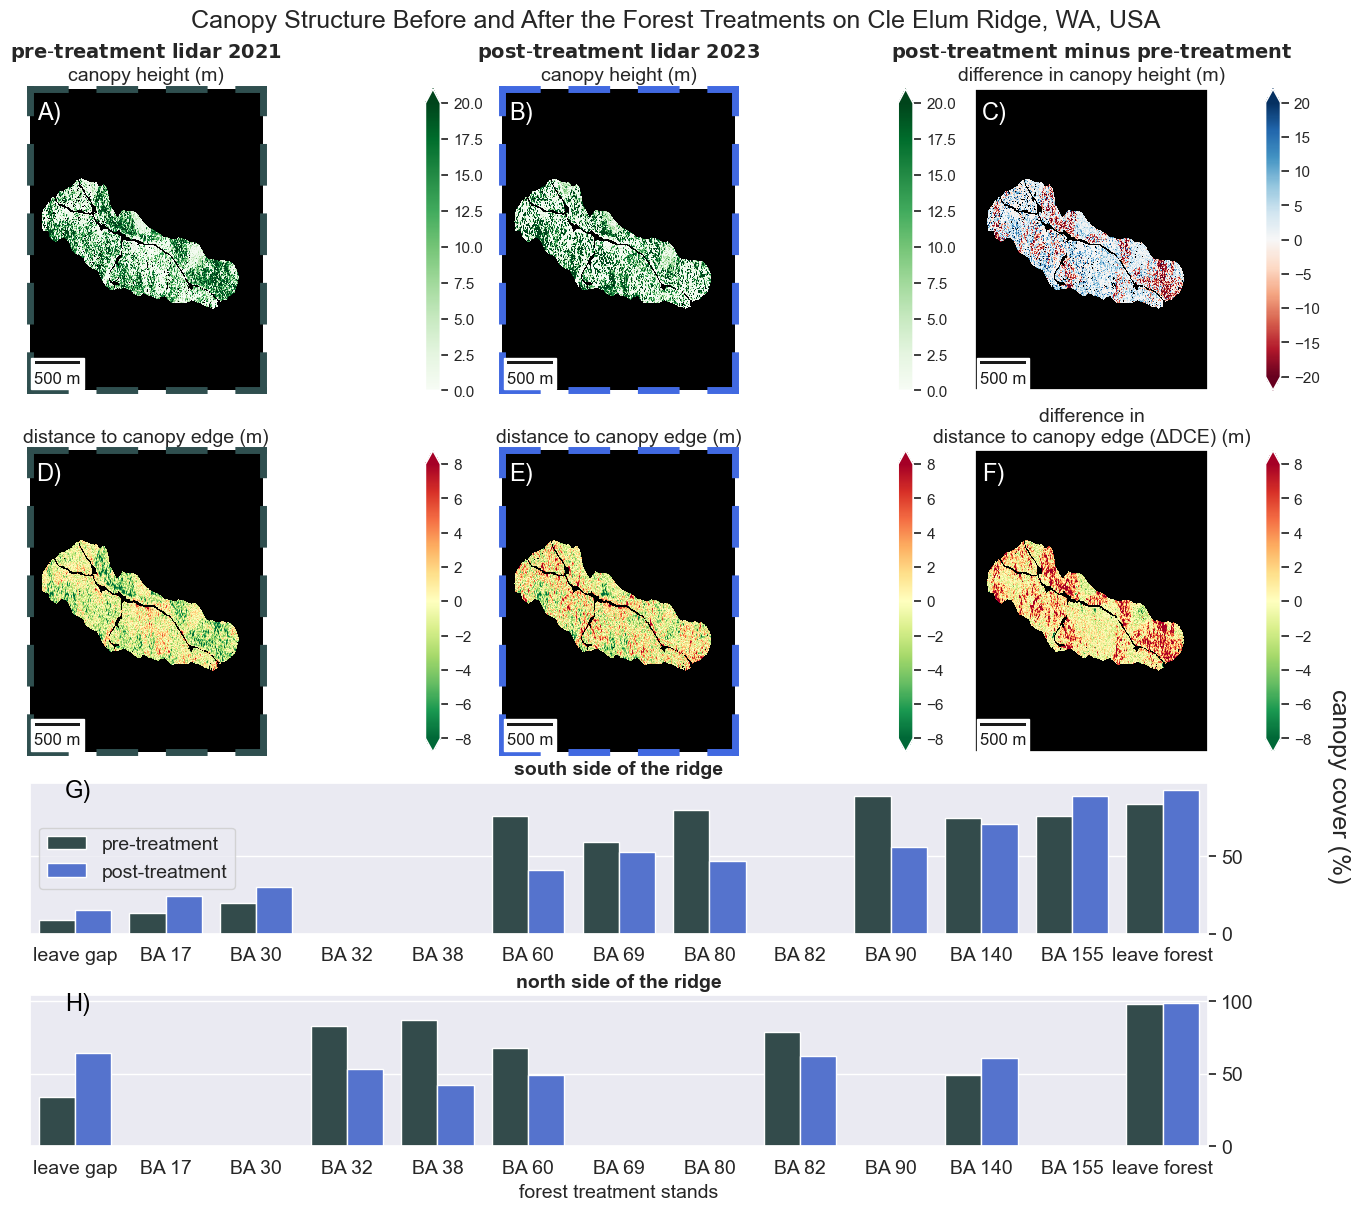

In [26]:
# FIGURE LAYOUT
fig = plt.figure(figsize=(13, 12), constrained_layout=True)
gs = GridSpec(4, 3, figure=fig, height_ratios=[2, 2, 1, 1])

# === TOP PART: A–F ===
axes_top = np.array([
    [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1]), fig.add_subplot(gs[0, 2])],
    [fig.add_subplot(gs[1, 0]), fig.add_subplot(gs[1, 1]), fig.add_subplot(gs[1, 2])]
])

# Plot canopy height and distance to canopy edge maps
ds.chmws_ncalm.plot(ax=axes_top[0, 0], cmap='Greens', vmin=0, vmax=20, cbar_kwargs={'label': ''})
ds.chmws_rapid.plot(ax=axes_top[0, 1], cmap='Greens', vmin=0, vmax=20, cbar_kwargs={'label': ''})
ds.diff_chm_rapid_ncalm.plot(ax=axes_top[0, 2], cmap='RdBu', vmin=-20, vmax=20, cbar_kwargs={'label': ''})

axes_top[0, 0].set_title(r'$\mathbf{pre\text{-}treatment\ lidar\ 2021}$' + '\ncanopy height (m)', fontsize=14)
axes_top[0, 1].set_title(r'$\mathbf{post\text{-}treatment\ lidar\ 2023}$' + '\ncanopy height (m)', fontsize=14)
axes_top[0, 2].set_title(r'$\mathbf{post\text{-}treatment\ minus\ pre\text{-}treatment}$' + '\ndifference in canopy height (m)', fontsize=14)

ds.dce_ncalm.plot(ax=axes_top[1, 0], cmap='RdYlGn_r', vmin=-8, vmax=8, cbar_kwargs={'label': ''})
ds.dce_rapid.plot(ax=axes_top[1, 1], cmap='RdYlGn_r', vmin=-8, vmax=8, cbar_kwargs={'label': ''})
ds.diff_dce_rapid_ncalm.plot(ax=axes_top[1, 2], cmap='RdYlGn_r', vmin=-8, vmax=8, cbar_kwargs={'label': ''})

axes_top[1, 0].set_title('distance to canopy edge (m)', fontsize=14)
axes_top[1, 1].set_title('distance to canopy edge (m)', fontsize=14)
axes_top[1, 2].set_title('difference in\ndistance to canopy edge (ΔDCE) (m)', fontsize=14)

# Add scale bars and remove ticks
for ax in axes_top.ravel():
    ax.set_facecolor("black")
    scalebar = ScaleBar(1, "m", length_fraction=0.25, location='lower left')
    ax.add_artist(scalebar)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')

# Add dashed boxes
line_set_up = (20, (5, 5))
width = 5
highlight_idxs = [0, 1, 3, 4]
highlight_colors = [colorpre, colorpos, colorpre, colorpos]
for idx, color in zip(highlight_idxs, highlight_colors):
    for spine in axes_top.ravel()[idx].spines.values():
        spine.set_edgecolor(color)
        spine.set_linewidth(width)
        spine.set_linestyle(line_set_up)

# Subplot labels A–F
labels = ['A)', 'B)', 'C)', 'D)', 'E)', 'F)']
for ax, label in zip(axes_top.ravel(), labels):
    ax.text(0.03, 0.90, label, fontsize=17, color='white', transform=ax.transAxes)

# === BOTTOM PART: G–H ===
ax7 = fig.add_subplot(gs[2, :])
ax8 = fig.add_subplot(gs[3, :])
palette = [colorpre, colorpos]

sns.barplot(data=df_tidy_south, ax=ax7, x='BAF', y='canopy_cover', hue='treatment', palette=palette)
sns.barplot(data=df_tidy_north, ax=ax8, x='BAF', y='canopy_cover', hue='treatment', palette=palette)

ax7.set_title('south side of the ridge', fontsize=14, fontweight='bold')
ax8.set_title('north side of the ridge', fontsize=14, fontweight='bold')
ax8.set_xlabel('forest treatment stands', fontsize=14)
ax7.set_xlabel('')
ax7.set_ylabel('')
ax8.set_ylabel('')

# Format
for ax in [ax7, ax8]:
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position("right")
    ax.tick_params(axis='both', which='major', labelsize=14)

ax7.legend(fontsize=14)
ax8.legend().set_visible(False)

# Labels G–H
ax7.text(0.03, 0.90, 'G)', fontsize=17, color='black', transform=ax7.transAxes)
ax8.text(0.03, 0.90, 'H)', fontsize=17, color='black', transform=ax8.transAxes)

# Shared y-axis label
fig.text(1.01, 0.35, 'canopy cover (%)', ha='center', va='center', rotation=270, fontsize=18)

# title over the whole figure
plt.suptitle('Canopy Structure Before and After the Forest Treatments on Cle Elum Ridge, WA, USA', fontsize=18)

# title over the bottom two subplots
# ax7.set_title('Percentage of Canopy Cover in Each Forest Treatment Stand', fontsize=18
#             , y=1.05, x=0.5, ha='center', va='center')

# export the figure with high resolution
# figure_name = 'figure2_all_together_unfinished.png'
# plt.savefig(figure_path + figure_name, dpi=500)

plt.show()
